In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Salary_Data.csv')
x, y = data['YearsExperience'], data['Salary']

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
def lin_reg(x, y):
    N = len(x)
    xmean, ymean = x.mean(), y.mean()
    beta1 = (((x - xmean)*(y - ymean)).sum()) / (((x - xmean)**2.).sum())
    beta0 = ymean - (beta1 * xmean)
    reg_line = r'y = {} + {}\beta'.format(beta0, beta1)
    return beta0, beta1, reg_line

def corr_coeff(x,y):
    N = len(x)
    num = (N * (x * y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2.).sum() - x.sum()**2.) * (N * (y**2.).sum() - y.sum()**2.))
    R = num/den
    return R

In [5]:
b0, b1, rline = lin_reg(x,y)
print('Regression line: ', rline)
R = corr_coeff(x,y)
print('Correlation coefficient: ', R)
print('Goodness of fit: ', R**2.)


Regression line:  y = 25792.20019866869 + 9449.962321455077\beta
Correlation coefficient:  0.97824161848876
Goodness of fit:  0.9569566641435087


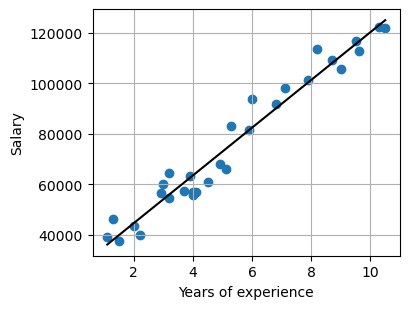

In [6]:
plt.figure(figsize=(4.2,3.2), dpi=100)
plt.scatter(x,y)
plt.plot(x, b0 + b1*x, 'k')
plt.xlim([min(x)-0.5, max(x)+0.5])
plt.xlabel('Years of experience', fontsize=10)
plt.ylabel('Salary', fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

0.0


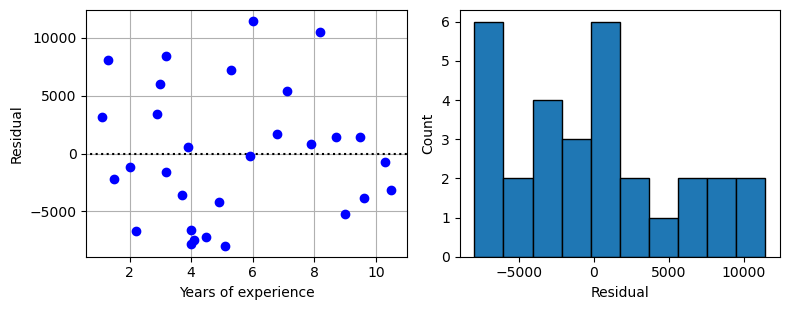

In [7]:
residual = []
for i in range(0,len(x)):
    residual.append(y[i]-(b0 + b1*x[i]))    
print(sum(residual))

plt.figure(figsize=(8,3.2), dpi=100)
plt.subplot(1,2,1)
plt.plot([0,100],[0,0],'k:')
plt.plot(x, (y-(b0 + b1*x)),'bo')
plt.xlim([min(x)-0.5, max(x)+0.5])
plt.xlabel('Years of experience', fontsize=10); plt.ylabel('Residual', fontsize=10)
plt.grid()


plt.subplot(1,2,2)
# Creating histogram
N, bins, patches = plt.hist(residual, edgecolor='k')
plt.xlabel('Residual', fontsize=10); plt.ylabel('Count', fontsize=10)
plt.tight_layout()

plt.show()